<a href="https://colab.research.google.com/github/ChetanKillewale-25/CNN-3-classifier/blob/main/Saving_a_basic_fastai_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading the Essential

In [ ]:
!pip install fastbook

## Downloading the Data

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
??search_images_ddg

In [ ]:
ims = search_images_ddg("ironMan")
len(ims)

200

In [ ]:
dest = 'images/ironman.jpg'
download_url(ims[0],dest,show_progress = False)

Path('images/ironman.jpg')

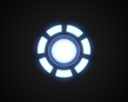

In [ ]:
im = Image.open(dest)
im.to_thumb(128,128)

In [ ]:
marvel = 'ironman','spiderman','antman'
path = Path('marvel')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in marvel:
        dest = (path/o)
        dest.mkdir(exist_ok = True)
        results = search_images_ddg(f'{o} marvel')
        download_images(dest,urls = results)

In [ ]:
fns = get_image_files(path)
fns

(#555) [Path('marvel/antman/eb64f81d-426d-48bc-9c9c-480585bf5051.jpg'),Path('marvel/antman/12d91260-ae24-4230-9d63-74cbb1026e45.jpg'),Path('marvel/antman/684bdb16-14d3-4c63-9717-7e90b397d910.jpg'),Path('marvel/antman/5d9be2cb-c376-4f88-bbe6-5503b42fdcfe.png'),Path('marvel/antman/d191e7c2-f6cf-4a05-b062-ceea1fd82193.jpg'),Path('marvel/antman/dc423b19-7bd4-4fd2-9fd2-4f8d74545ffd.jpg'),Path('marvel/antman/0e86f823-01b1-48dd-99f0-11ebfbb18817.jpg'),Path('marvel/antman/1bb0022c-f7eb-4c18-8082-98d13383e223.png'),Path('marvel/antman/27dbc0a9-9a4a-4c67-b90b-141d12e5b05c.jpg'),Path('marvel/antman/078f14b2-612e-4cd7-9e85-50fb54a54eb9.jpg')...]

In [ ]:
failed = verify_images(fns)

In [ ]:
failed.map(Path.unlink)

(#12) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
doc(verify_images)

verify_images(fns)
Find images in `fns` that can't be opened

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [ ]:
marvel = DataBlock(blocks = (ImageBlock,CategoryBlock),
                  get_items = get_image_files,
                  splitter = RandomSplitter(valid_pct = 0.2,seed = 42),
                  get_y = parent_label,
                  item_tfms = Resize(128))

In [ ]:
dls = marvel.dataloaders(path)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


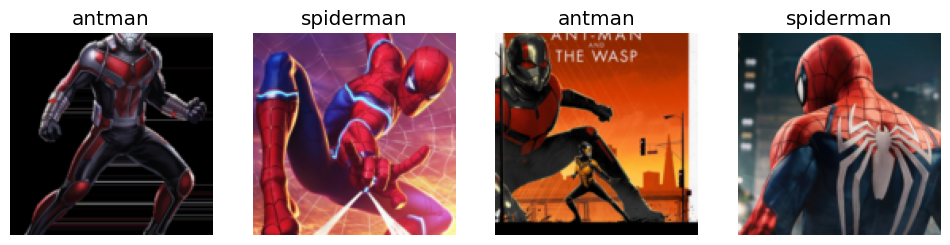

In [ ]:
dls.valid.show_batch(max_n=4,nrows=1)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


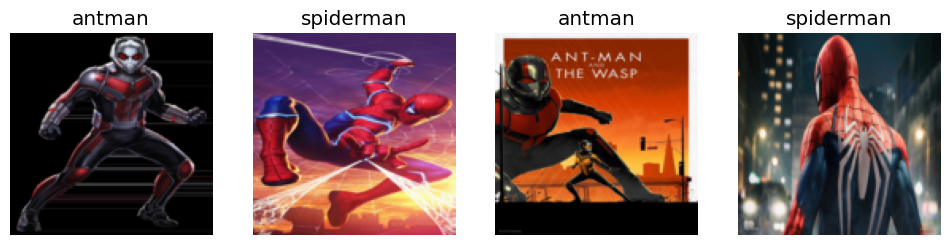

In [ ]:
marvel = marvel.new(item_tfms = Resize(128,ResizeMethod.Squish))
dls = marvel.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


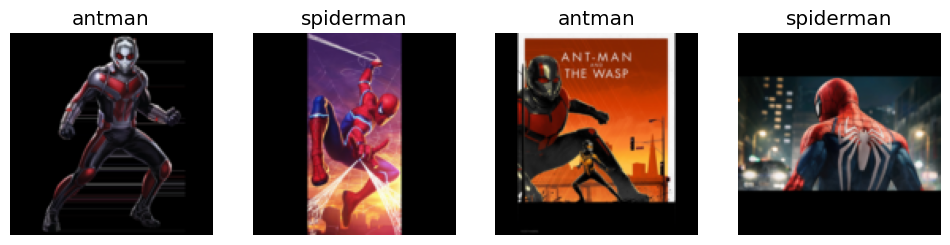

In [ ]:
marvel = marvel.new(item_tfms = Resize(128,ResizeMethod.Pad,pad_mode = 'zeros'))
dls = marvel.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

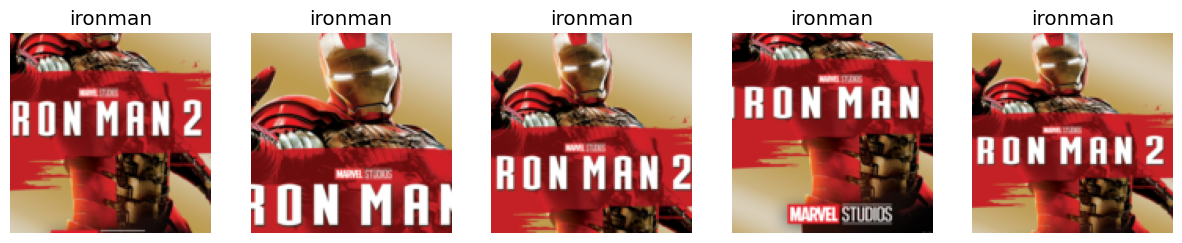

In [ ]:
marvel = marvel.new(item_tfms = RandomResizedCrop(128,min_scale=0.3))
dls = marvel.dataloaders(path)
dls.train.show_batch(max_n=5,nrows=1,unique = True)

## Data Augmentation

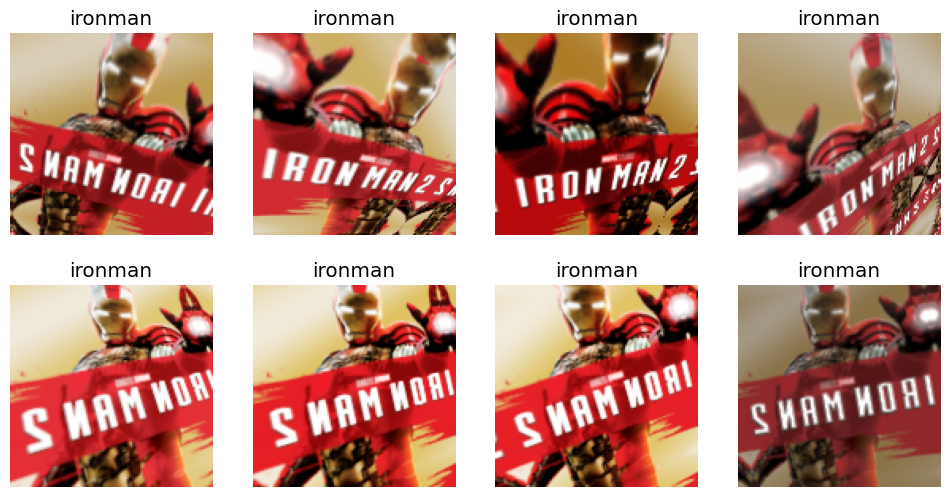

In [ ]:
marvel = marvel.new(item_tfms = Resize(128),batch_tfms=aug_transforms(mult=2))
dls = marvel.dataloaders(path)
dls.train.show_batch(max_n=8,nrows=2,unique = True)

## Transform Your Model and Using it to clean Your data

In [ ]:
marvel = marvel.new(item_tfms=RandomResizedCrop(224,min_scale=0.5),
                  batch_tfms=aug_transforms)
dls = marvel.dataloaders(path)

In [ ]:
learn = vision_learner(dls,resnet18,metrics = error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 35.7MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.625604,0.653517,0.240741,02:16


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.798509,0.558991,0.166667,02:44
1,0.589538,0.536638,0.129630,02:53
2,0.481857,0.543212,0.111111,02:41
3,0.389743,0.527408,0.111111,02:39


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


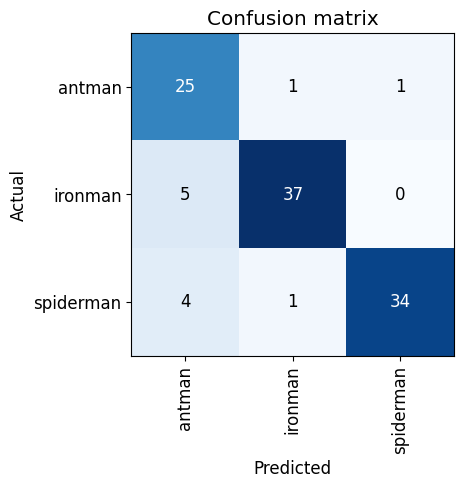

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

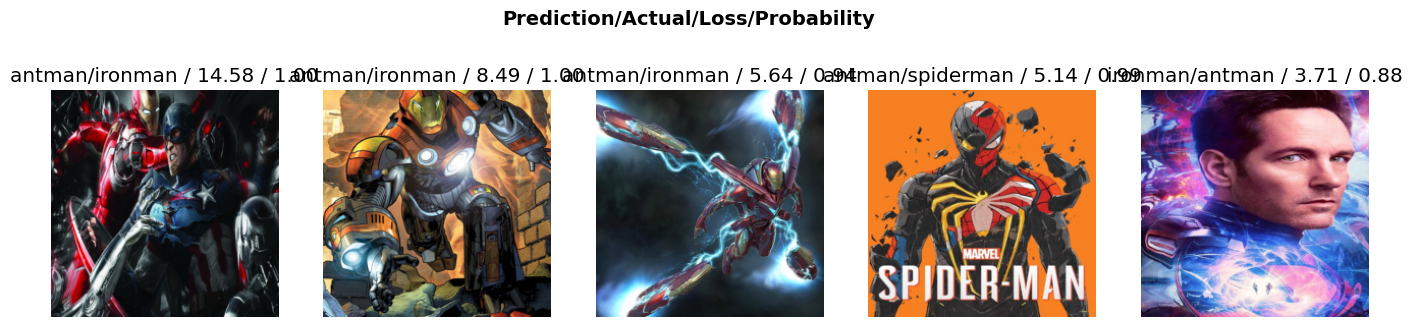

In [ ]:
interp.plot_top_losses(5,nrows=1,figsize=(17,4))


In [ ]:
cleaner = ImageClassifierCleaner(learn)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
??ImageClassifierCleaner

In [ ]:
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()
for idx,cat in cleaner.change():
    shutil.move(str(cleaner))

In [ ]:
from fastai.vision.all import *

In [ ]:
learn.export('model.pkl')

# APP

In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.9 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=

In [ ]:
pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.2 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import timm

In [ ]:
learn = load_learner('model.pkl')

In [ ]:
learn

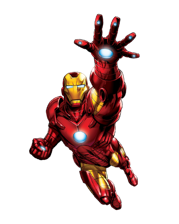

In [ ]:
dest = 'images/ironman.jpg'
download_url(ims[7],dest,show_progress = False)
im_t = Image.open(dest)
im_t.to_thumb(224,224)

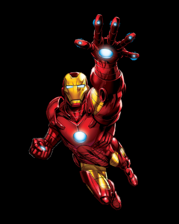

In [ ]:
im_t = PILImage.create('images/ironman.jpg')
im_t.thumbnail((224,224))
im_t

In [ ]:
learn.predict(im_t)

('ironman', tensor(1), tensor([3.5808e-06, 9.9989e-01, 1.0635e-04]))

In [ ]:
categories = learn.dls.vocab

def classify_image(img):
  pred,idx,probs = learn.predict(img)
  return dict(zip(categories,map(float,probs)))

In [ ]:
classify_image(im_t)

{'antman': 3.5807536278298358e-06,
 'ironman': 0.9998900890350342,
 'spiderman': 0.00010634763020789251}

In [ ]:
intf = gr.Interface(fn = classify_image,inputs = 'image',outputs = 'label',examples =['images/ironman.jpg'] )

In [ ]:
intf.launch(inline = False)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c41773e387b827fcd0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
